In [116]:
import os
import urllib
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

RANDOM_SEED = 5

def download(url, save_path):
  save_dir = os.path.dirname(save_path)
  if(not os.path.exists(save_dir)):
    os.makedirs(save_dir)
  download = urllib.request.urlretrieve(url, save_path)

train_url = 'https://drive.google.com/uc?export=download&id=1QBnjVP59KaJwauaGLMqwx_N0PDDcvS9M'
train_save_path = './data/abalone_train.csv'
download(train_url, train_save_path)

In [117]:
df = pd.read_csv(train_save_path)
df

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole_weight    4177 non-null   float64
 5   Shucked_weight  4177 non-null   float64
 6   Viscera_weight  4177 non-null   float64
 7   Shell_weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [119]:
df.describe()

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


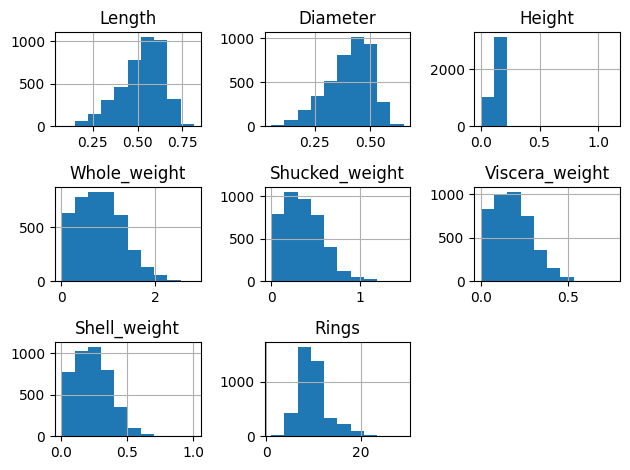

In [120]:

columns = ['Length', 'Diameter','Height','Whole_weight','Shucked_weight','Viscera_weight','Shell_weight','Rings']
df[columns].hist()

plt.tight_layout()
plt.show()

In [121]:
df.corr()

<ipython-input-121-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
Length,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720
Diameter,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660
Height,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467
Whole_weight,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390
Shucked_weight,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884
Viscera_weight,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819
Shell_weight,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574
Rings,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000


<ipython-input-122-00b6926ae777>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, fmt='.2f')


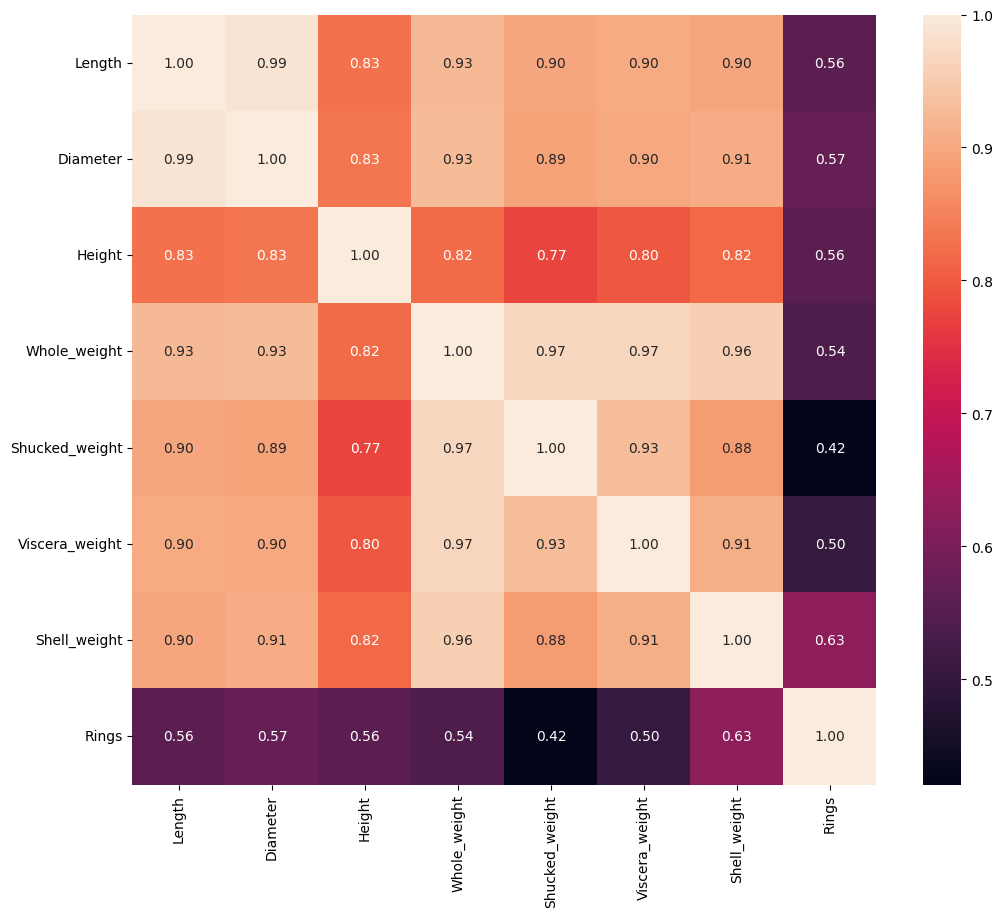

In [122]:

plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), annot=True, fmt='.2f')
plt.show()

In [123]:

selected_features = ['Length', 'Diameter',
                     'Height', 'Whole_weight', 'Shucked_weight', 'Viscera_weight','Shell_weight']
X = df[selected_features]
y = df['Rings']

test_ratio = 0.2
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=test_ratio,
                                                      random_state=RANDOM_SEED)

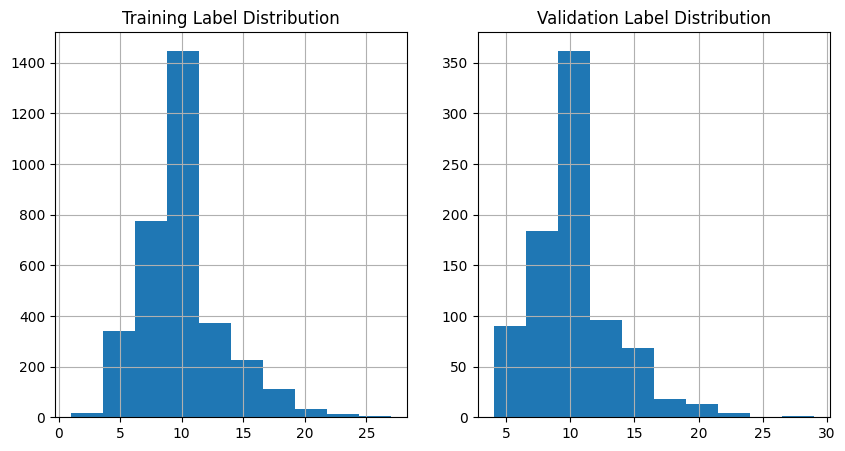

In [124]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
y_train.hist()
plt.title('Training Label Distribution')

plt.subplot(1,2,2)
y_valid.hist()
plt.title('Validation Label Distribution')

plt.show()

In [125]:
classifier = tree.DecisionTreeClassifier(max_depth=5)
classifier = classifier.fit(X_train, y_train)

In [126]:
def calculate_accuracy(pred_labels: np.ndarray, true_labels: np.ndarray):
    accuracy = np.sum(pred_labels==true_labels) / true_labels.__len__() * 100
    return accuracy
pred_train = classifier.predict(X_train)
acc_train = calculate_accuracy(pred_train, y_train)
print(f'Model accuracy on training data set is {acc_train:.2f}%')


pred_valid = classifier.predict(X_valid)
acc_valid = calculate_accuracy(pred_valid, y_valid)
print(f'Model accuracy on validation data set is {acc_valid:.2f}%')

Model accuracy on training data set is 31.31%
Model accuracy on validation data set is 26.44%


In [127]:
import graphviz

class_names = [str(cls) for cls in sorted(df['Rings'].unique())]
dot_data = tree.export_graphviz(classifier,
                      feature_names=selected_features,
                      class_names=class_names,
                      filled=True, rounded=True,
                      special_characters=True)
graph = graphviz.Source(dot_data)


graph.render(filename='tree', format='png')

'tree.png'